<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Visão Computacional e Processamento de Imagens

Prof. Rilder de Sousa Pires<br>
Aluno: José Freitas Alves Neto<br>
Matricula:2519203<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>
Universidade de Fortaleza

# Questão 01
- Reproduza o código abaixo e verifique que ele produz a figura.


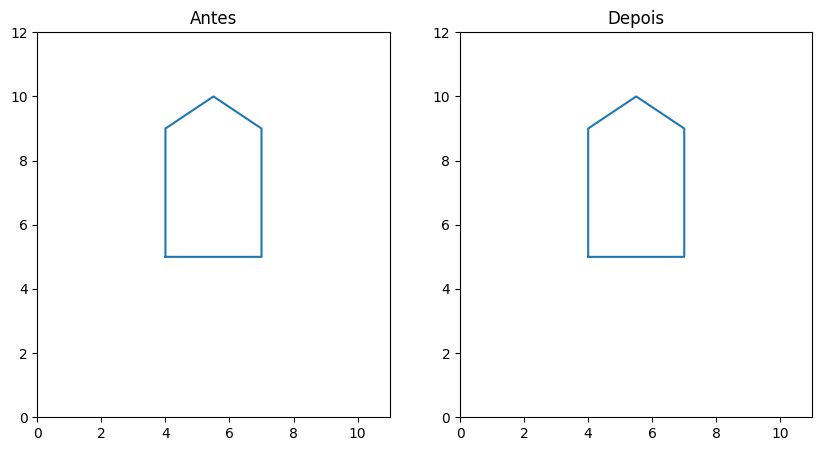

In [1]:
import matplotlib.pyplot as plt
import numpy as np
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
P = np.array([[4,5],[7,5],[7,9],[5.5,10],[4,9],[4,5]]).T

ax1.set_title('Antes')
ax1.set_xlim([0,11])
ax1.set_ylim([0,12])

ax2.set_title('Depois')
ax2.set_xlim([0,11])
ax2.set_ylim([0,12])

#-------------------
# Dfeina aqui o P1

P1 = P

#-------------------

ax1.plot(P[0],P[1])
ax2.plot(P1[0],P1[1])

plt.show()

# Questão 02
- Altere o código anterior para produzir, utilizando álgebra linear, as seguintes
Transformações Geométricas:

## Item A
- Translação: dx = 3, dy = -4<br>
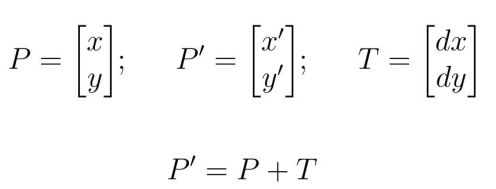

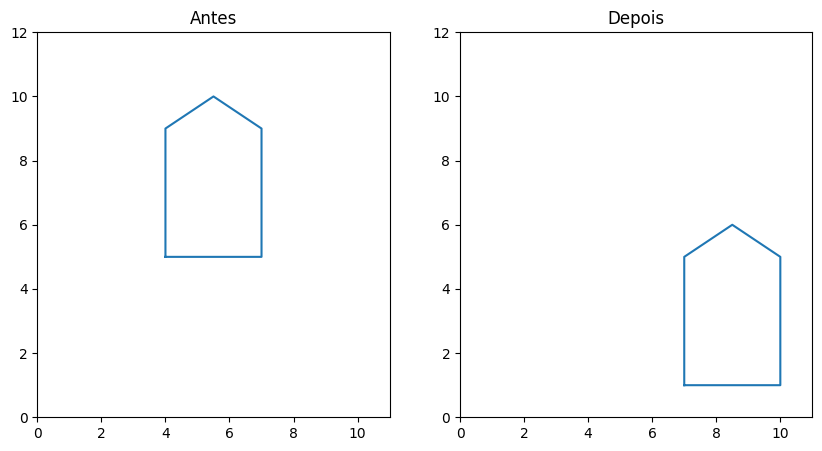

In [2]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
P = np.array([[4,5],[7,5],[7,9],[5.5,10],[4,9],[4,5]]).T

dx = 3
dy = -4

ax1.set_title('Antes')
ax1.set_xlim([0,11])
ax1.set_ylim([0,12])

ax2.set_title('Depois')
ax2.set_xlim([0,11])
ax2.set_ylim([0,12])

#-------------------
# Dfeina aqui o P1

P1 = P.copy()
P1[0] = P1[0] + dx
P1[1] = P1[1] + dy
#-------------------

ax1.plot(P[0],P[1])
ax2.plot(P1[0],P1[1])

plt.show()

## Item B
- Escala: sx = 0.5, sy = 0.25<br>
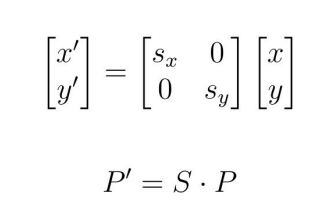

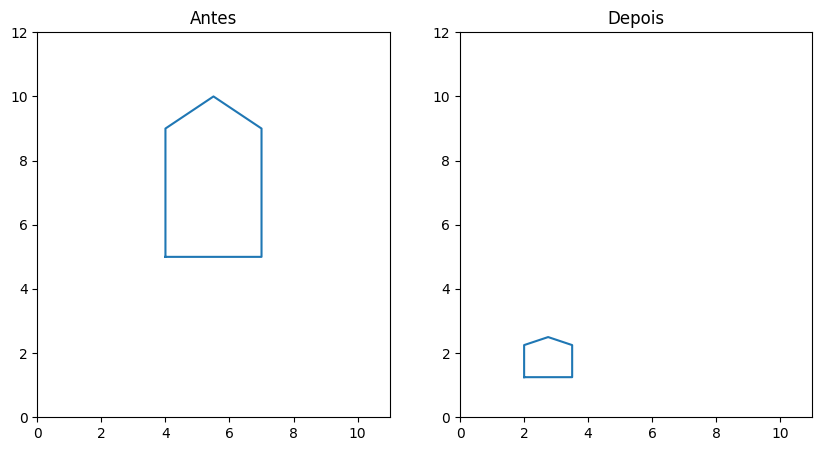

In [3]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
P = np.array([[4,5],[7,5],[7,9],[5.5,10],[4,9],[4,5]]).T

sx = 0.5
sy = 0.25
escala = np.array([[sx,0],[0,sy]])

ax1.set_title('Antes')
ax1.set_xlim([0,11])
ax1.set_ylim([0,12])

ax2.set_title('Depois')
ax2.set_xlim([0,11])
ax2.set_ylim([0,12])

#-------------------
# Dfeina aqui o P1

P1 = P.copy()
P1 = np.dot(escala,P1)
#-------------------

ax1.plot(P[0],P[1])
ax2.plot(P1[0],P1[1])

plt.show()

## Item C
- Rotação: θ = π/8<br>
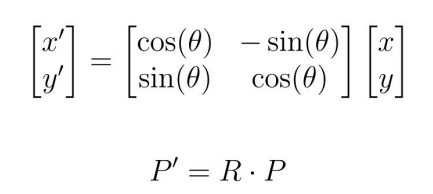

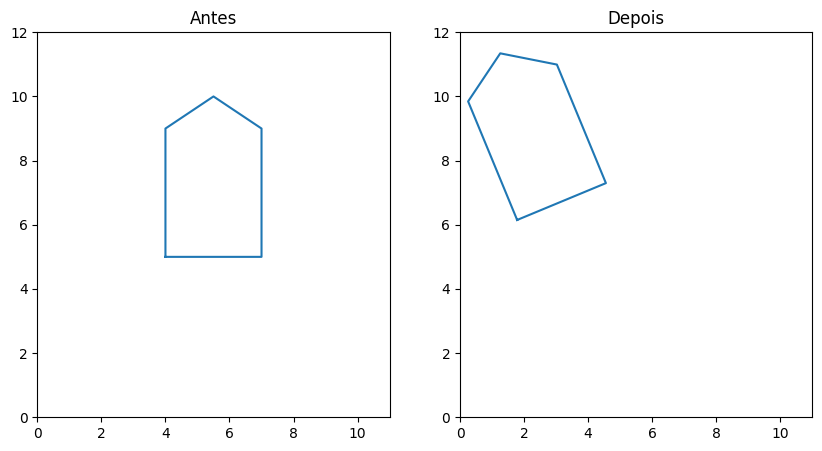

In [4]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
P = np.array([[4,5],[7,5],[7,9],[5.5,10],[4,9],[4,5]]).T
teta = np.pi/8

escala = np.array([[np.cos(teta),-np.sin(teta)],[np.sin(teta),np.cos(teta)]])

ax1.set_title('Antes')
ax1.set_xlim([0,11])
ax1.set_ylim([0,12])

ax2.set_title('Depois')
ax2.set_xlim([0,11])
ax2.set_ylim([0,12])

#-------------------
# Dfeina aqui o P1

P1 = P.copy()
P1 = np.dot(escala,P1)
#-------------------

ax1.plot(P[0],P[1])
ax2.plot(P1[0],P1[1])

plt.show()

# Questão 03
- Implemente os exemplos mostrados no notebook “2.1 - Coordenadas
Homogêneas.ipynb” utilizando apenas a numpy.


## Item A
- Translação<br>
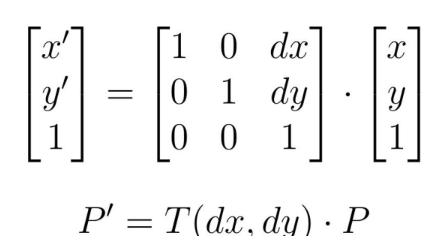

- Imagem original

Downloading...
From: https://drive.google.com/uc?id=1JHuCNfzB_inGLc_S77SMHE-l0pHNq0jA
To: /content/deathnote.jpg
100% 98.9k/98.9k [00:00<00:00, 38.2MB/s]


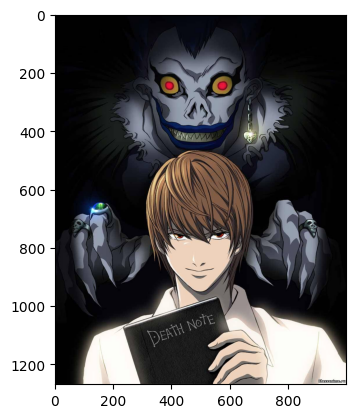

In [5]:
import cv2 as cv
# Baixando a imagem que vamos usar
!gdown 1JHuCNfzB_inGLc_S77SMHE-l0pHNq0jA
imagem = cv.imread('/content/deathnote.jpg')
imagem = cv.cvtColor(imagem,cv.COLOR_BGR2RGB)
plt.imshow(imagem)
plt.show()

- Translação

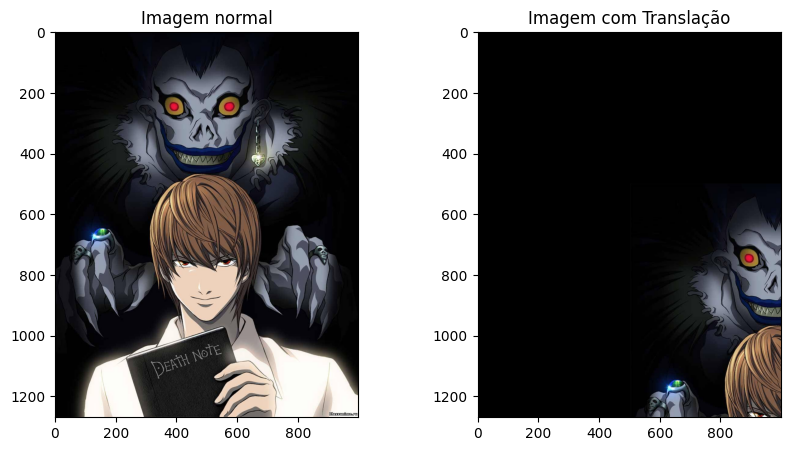

In [21]:
# Criando matriz
x = 500
y = 500
T = np.float32([[1, 0, x], [0, 1, y]])

imagem = cv.imread('/content/deathnote.jpg')
imagem = cv.cvtColor(imagem,cv.COLOR_BGR2RGB)

altura,largura = imagem.shape[0],imagem.shape[1]

nova_imagem = np.zeros_like(imagem)

for cord_alt in range(altura):
    for cord_lar in range(largura):
        pixel = np.array([cord_lar,cord_alt,1])

        nova_coordenada = np.dot(T,pixel)
        eixo_x_new,eixo_y_new = int(nova_coordenada[0]),int(nova_coordenada[1])
        if 0 <= eixo_x_new <largura and 0 <= eixo_y_new <altura:
           nova_imagem[eixo_y_new,eixo_x_new] = imagem[cord_alt,cord_lar]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('Imagem normal')
ax1.imshow(imagem)

ax2.set_title('Imagem com Translação')
ax2.imshow(nova_imagem)

plt.show()

## Item B
- Escala<br>
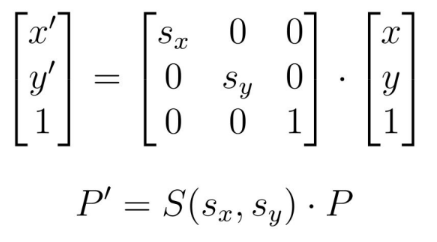

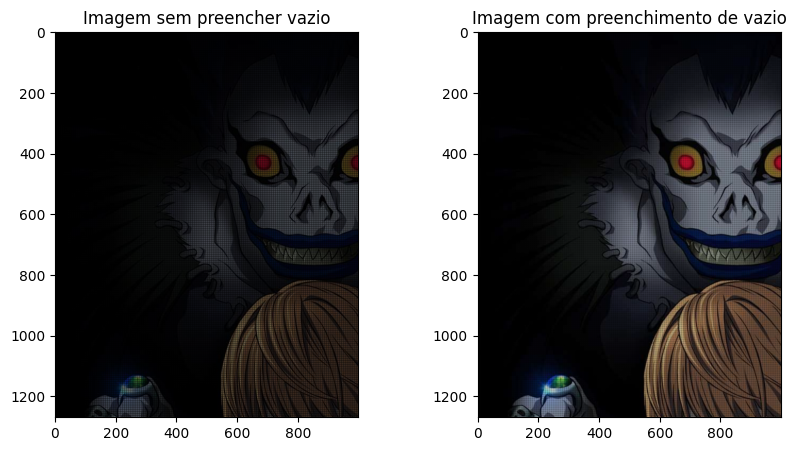

In [25]:
# Criando matriz
sx = 1.75
sy = 1.75
T = np.float32([[sx, 0, 0], [0, sy, 0]])

imagem = cv.imread('/content/deathnote.jpg')
imagem = cv.cvtColor(imagem,cv.COLOR_BGR2RGB)

altura,largura = imagem.shape[0],imagem.shape[1]

nova_imagem = np.ones_like(imagem,dtype=np.int16) * -int(1)

for cord_alt in range(altura):
    for cord_lar in range(largura):
        pixel = np.array([cord_lar,cord_alt,1])

        nova_coordenada = np.dot(T,pixel)
        eixo_x_new,eixo_y_new = int(nova_coordenada[0]),int(nova_coordenada[1])
        if 0 <= eixo_x_new <largura and 0 <= eixo_y_new <altura:
           nova_imagem[eixo_y_new,eixo_x_new] = imagem[cord_alt,cord_lar]

imagem_cores_ajustadas = nova_imagem.copy()
for cord_alt in range(altura):
  for cord_lar in range(largura):
      pixel = imagem_cores_ajustadas[cord_alt,cord_lar]
      if pixel[0] == -1 and  pixel[1] == -1 and  pixel[2] == -1:
          vizinhos = []
          for i in range(cord_alt - 1, cord_alt + 2):
                    for j in range(cord_lar - 1, cord_lar + 2):
                        if 0 <= i < altura and 0 <= j < largura:
                              if(i != cord_alt or j != cord_lar):
                                  vizinhos.append(imagem_cores_ajustadas[i, j])

                # Se houver vizinhos, calcula a média
          if vizinhos:
            imagem_cores_ajustadas[cord_alt, cord_lar] = np.mean(vizinhos, axis=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('Imagem sem preencher vazio')
ax1.imshow(nova_imagem)

ax2.set_title('Imagem com preenchimento de vazio')
ax2.imshow(imagem_cores_ajustadas)

plt.show()

# Item C
- Rotação<br>
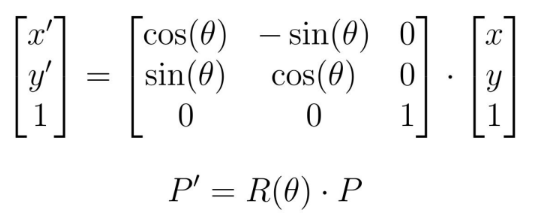

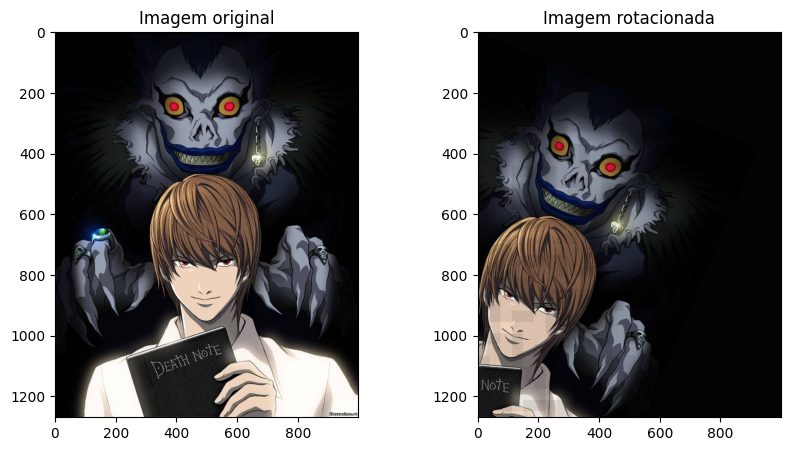

In [12]:
# Criando matriz
teta = np.pi/8
T = np.float32([[np.cos(teta), -np.sin(teta), 0], [np.sin(teta), np.cos(teta), 0]])

imagem = cv.imread('/content/deathnote.jpg')
imagem = cv.cvtColor(imagem,cv.COLOR_BGR2RGB)

altura,largura = imagem.shape[0],imagem.shape[1]

nova_imagem = np.ones_like(imagem) * int(3)

for cord_alt in range(altura):
    for cord_lar in range(largura):
        pixel = np.array([cord_lar,cord_alt,1])

        nova_coordenada = np.dot(T,pixel)
        eixo_x_new,eixo_y_new = int(nova_coordenada[0]),int(nova_coordenada[1])
        if 0 <= eixo_x_new <largura and 0 <= eixo_y_new <altura:
           nova_imagem[eixo_y_new,eixo_x_new] = imagem[cord_alt,cord_lar]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('Imagem original')
ax1.imshow(imagem)

ax2.set_title('Imagem rotacionada')
ax2.imshow(nova_imagem)

plt.show()

# Item D
- Transformação afim<br>
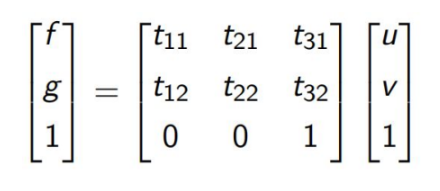

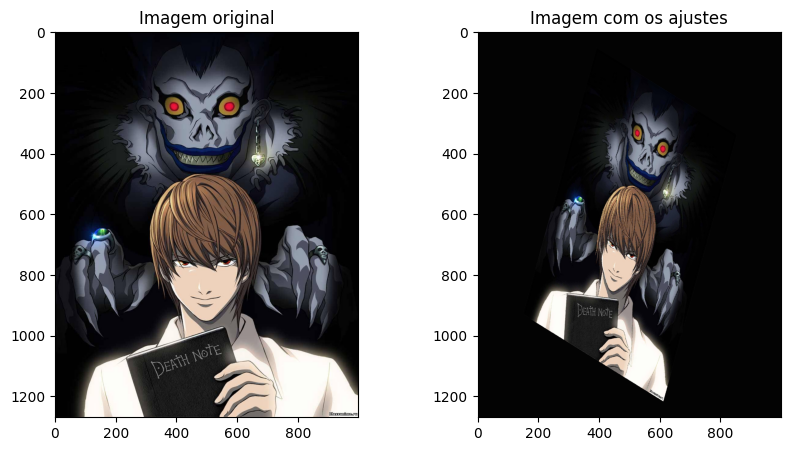

In [35]:
# Carregando imagem
imagem = cv.imread('/content/deathnote.jpg')
imagem = cv.cvtColor(imagem,cv.COLOR_BGR2RGB)

altura,largura = imagem.shape[0],imagem.shape[1]

nova_imagem = np.ones_like(imagem) * int(3)

for cord_alt in range(altura):
    for cord_lar in range(largura):
        pixel = np.array([cord_lar,cord_alt,1])
        # Trazendo o centro da imagem para a origem
        centro_exito_X = -int(imagem.shape[1])/2
        centro_exito_Y = -int(imagem.shape[0])/2
        T_Translacao = np.float32([[1, 0, centro_exito_X], [0, 1, centro_exito_Y]])
        nova_coordenada = np.dot(T_Translacao,pixel)

        # Aplicando rotação na imagem
        teta = np.pi/8
        T_rotacao = np.float32([[np.cos(teta), -np.sin(teta), 0], [np.sin(teta), np.cos(teta), 0]])
        nova_coordenada = np.append(nova_coordenada,1)
        nova_coordenada = np.dot(T_rotacao,nova_coordenada)

        # Aplicando escala na imagem
        sx = 0.5
        sy = 0.75
        T_escala = np.float32([[sx, 0, 0], [0, sy, 0]])
        nova_coordenada = np.append(nova_coordenada,1)
        nova_coordenada = np.dot(T_escala,nova_coordenada)

        # Devolvendo imagem para o ponto inicial
        centro_exito_X = int(imagem.shape[1])/2
        centro_exito_Y = int(imagem.shape[0])/2
        T_Translacao = np.float32([[1, 0, centro_exito_X], [0, 1, centro_exito_Y]])
        nova_coordenada = np.append(nova_coordenada,1)
        nova_coordenada = np.dot(T_Translacao,nova_coordenada)

        eixo_x_new,eixo_y_new = int(nova_coordenada[0]),int(nova_coordenada[1])
        if 0 <= eixo_x_new <largura and 0 <= eixo_y_new <altura:
           nova_imagem[eixo_y_new,eixo_x_new] = imagem[cord_alt,cord_lar]



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('Imagem original')
ax1.imshow(imagem)

ax2.set_title('Imagem com os ajustes')
ax2.imshow(nova_imagem)

plt.show()